# Machine Learning for Genre Classification
## Part I: Feature Design and Extraction
### Tom Earnest

Different types of music can elicit highly diverse responses in the listener.  Songs can make us dance, headbob, relax, cry, laugh, or experience any number of emotions.  Part of this response is certainly affected by the social, cultural, and psychological background of a particular song or person.  In addition, there are many objective, quantifiable aspects of music which affect how we perceive music.  The tempo, rhythm, pitch classes, frequency distribution, and other measurable features of recordings contribute to the overall song.  Different musical genres differ in their makeup of such features; songs within the same genre will tend to overlap.  

Given relevant information extracted from audiofiles, I want to try and **train a ML algorithm to classify songs based on genre**.  In conducting this project, I’m hoping to gain:
 - A better understanding of ML
 - A better understanding of audio physics
 - More fluency with Python, particularly for ML and for audio processing


In this first notebook, I will introduce the features I plan to use and discuss why they may be useful.  At the end, I will post the code used to actually construct the ML dataset (by iterating over and processing each audio file).  In a second notebook, which will only be dependent on the dataset and _not_ the actual audio files, I will do the actual machine learning.

### Note on GitHub and file sharing

I am primarily sharing this project through [my GitHub](https://github.com/earnestt1234/biof509_finalproject).  In the main `/biof509_finalproject` directory, I will post the Jupyter Notebooks, as well as a `/Songlearning`folder.  This folder mimics the folder I would use as the working directory in constructing these notebooks.

__For both practical and legal reasons, I cannot upload and share the actual music files for these songs.__  Instead, I have just placed empty folders for each music genre, which can be populated with one's own files if desired (note that I have only tried `.wav` files with this program; many typical files like `.mp3` or `.mp4` will not work, at least not without some additional coding/installation).  A list of all the songs and their artists can be seen in the `ML Itunes.csv` file.

However, I have shared some of the sample audio clips which are used in this notebook; these are inside the main directory.

# Building the DataFrame

I have collected 50 .wav files for songs in four genres (classical, hiphop, jazz, and rock) from my pesonal music library.  Looping over each of these folders, we build 4 DataFrames (one for each genre) and concatenate them into one large DataFrame.  This will be the basis of our ML dataset.$^{1}$ 

$^{1}$ _Originally, I had planned to build a data frame by starting out with information from Itunes.  Copy/pasting a set of songs from Itunes into a spreadsheet will preserve all the column information.  However, some issues arose from this approach.  The primary problem was that the names of the .wav files do not match the Itunes names; Itunes processes the .wav file names to remove information about the track/album number.  This issue made it difficult to iterate over the files using the Itunes names as a guide.  The .wav files also lost the genre information when copied._

First, importing the libraries we need:

In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Setting the directory.

In [2]:
cd "D://Songlearning/"

D:\Songlearning


In [3]:
directory = "D://Songlearning/"

I'm calling `ls` here to further illustrate the contents of my directory.  Directly inside the folder are a few `.wav` files I will use for illustrating the feature design (as well as a `/sinewaves` folder for this same purpose.  There also `.csv` files in which we will save the relevant DataFrames we create.  There are four subfolders each containing the full audio files we will eventually process to build the ML dataset.  

In [4]:
ls

 Volume in drive D is BLUEDRIV
 Volume Serial Number is 6CFD-369F

 Directory of D:\Songlearning

05/02/2019  04:49 PM    <DIR>          .
05/02/2019  04:49 PM    <DIR>          ..
05/01/2019  02:34 PM        27,050,924 04 High Society.wav
05/01/2019  02:27 PM        45,099,644 04 Kick, Push.wav
05/01/2019  02:35 PM        60,343,756 05 Smoke On the Water.wav
05/01/2019  02:29 PM        29,344,828 1-24 Bagatelle for Piano In A Minor.wav
06/06/2009  08:33 PM         1,931,062 Bass_Blower_01.wav
05/05/2019  11:55 AM            25,434 Capture.JPG
05/05/2019  11:11 AM         1,139,588 cello low.wav
05/02/2019  02:18 PM    <DIR>          classical
05/05/2009  04:22 PM         1,058,444 discohouseguitC4.wav
05/02/2019  02:18 PM    <DIR>          hiphop
05/02/2019  02:18 PM    <DIR>          jazz
05/01/2019  05:03 PM            16,015 ML Itunes plus filename.csv
05/01/2019  04:02 PM            11,711 ML Itunes.csv
05/02/2019  02:17 PM    <DIR>          rock
05/05/2019  10:03 AM    <DIR>     

Here, we build a frame for the ML dataset as a Pandas DataFrame, `df`.

In [5]:
list_classical = []
list_hiphop = []
list_jazz = []
list_rock = []

for i in os.listdir(directory + "classical/"):
    list_classical.append(i)

for i in os.listdir(directory + "hiphop/"):
    list_hiphop.append(i)

for i in os.listdir(directory + "jazz/"):
    list_jazz.append(i)
    
for i in os.listdir(directory + "rock/"):
    list_rock.append(i)

df_classical = pd.DataFrame(list_classical)
df_classical.columns = ['song']
df_classical['genre'] = "classical"

df_hiphop = pd.DataFrame(list_hiphop)
df_hiphop.columns = ["song"]
df_hiphop["genre"] = "hiphop"

df_jazz = pd.DataFrame(list_jazz)
df_jazz.columns = ['song']
df_jazz["genre"] = "jazz"

df_rock = pd.DataFrame(list_rock)
df_rock.columns = ['song']
df_rock['genre'] = 'rock'

df_list = [df_classical, df_hiphop, df_jazz, df_rock]
df = pd.concat(df_list, ignore_index=True)

display(df)

,song,genre
0,2-18 Adagio In G Minor.wav,classical
1,"1-22 Symphony No. 94 In G Major, Hob.wav",classical
2,2-47 3 Gymnopédies_ Gymnopedie No.3.wav,classical
3,1-48 Symphony No. 5 In C Sharp Minor.wav,classical
4,2-21 Symphonies de Fanfares_ Rondeau.wav,classical
5,2-28 Symphonie Espagnole In D Minor.wav,classical
6,2-34 Sylvia_ Procession of Bacchus.wav,classical
7,2-46 The Sorcerer's Apprentice.wav,classical
8,"1-12 Solomon, HWV 67 (arr. for Organ.wav",classical
9,"2-02 Slavonic Dances, Op. 46, No.8 I.wav",classical


# Feature Design

Now that we have a structure for the data, we can start to develop some features that might be relevant for the ML task.  The main work horse for this process will be [LibROSA](https://librosa.github.io/librosa/), which offers a variety of functions for processing audio in Python.

LibROSA's funcionality depends on [loading the .wav files into a variable](https://librosa.github.io/librosa/generated/librosa.core.load.html#librosa.core.load).  This can be slow, so we will plan to do this only once for each song.  Ultimately, we will have a final loop for feature extraction, which iterates over every song once, loads it, extracts some desired features, and adds them to our DataFrame.  

First, however, I will go over some of the features using example audio files.  This will provide some justification for including each feature (i.e. why they may be informative for classification), and will also verify that LibROSA is providing accurate data.

For examples, I will use some files which are either in our directory or in a subfolder:

 - ["Kick, Push" by Lupe Fiasco](https://www.youtube.com/watch?v=Gl83mI69nX4), a contemporary hiphop song
 - ["Smoke On The Water" by Deep Purple](https://www.youtube.com/watch?v=ikGyZh0VbPQ), a famous classic rock song
 - ["Fur Elise" by Beethoven](https://www.youtube.com/watch?v=2fcX2dWmR6g), a classical composition for solo piano
 - 3 single instrument sounds (a synthetic bass note, a cello, and a violin)
 - A few raw sine waves, collected in the `/sinewaves` directory

## Duration

[get_duration()](https://librosa.github.io/librosa/generated/librosa.core.get_duration.html#librosa.core.get_duration) simply computes the length in seconds.  This may provide some discriminatory ability; particularly, jazz and classical songs are anecdotally longer and less-structured than popular rock or hip-hop music.

In [6]:
from librosa.core import get_duration

y, sr = librosa.load("05 Smoke On the Water.wav")
get_duration(y)

342.0845351473923

The "Smoke On The Water" file we have has a duration of 5 minutes and 42 seconds, which get_duration correctly measures.

## Tempo

Tempo is inherently related to genre.  For songs with a consistent beat, the tempo will inevitably affect the song's feeling.  The [tempo()](https://librosa.github.io/librosa/generated/librosa.beat.tempo.html#librosa.beat.tempo) function will estimate the tempo in beats per minute (BPM).

In [7]:
from librosa.beat import tempo

kick, sr = librosa.load("04 Kick, Push.wav")
kick_tempo = tempo(kick)

kick_tempo

C:\Users\earne\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


array([95.703125])

Using a [tempo tapping tool](https://www.all8.com/tools/bpm.htm), we can confirm that "Kick, Push" has a BPM of about 95.

_However_, consider the estimation of "Smoke on the Water".  Tapping the tempo out indicates a BPM of about 112, while LibROSA estimates approximately 117:

In [8]:
from librosa.beat import tempo

smoke, sr = librosa.load("05 Smoke On the Water.wav")
smoke_tempo = tempo(smoke)

smoke_tempo

array([117.45383523])

Understandably, the algorithm does not compute the tempo in the same way a human would (i.e. by "sensing the rhythm").  While I am not sure how LibROSA estimates tempo, it is likely prone to error associated with idiosyncrasies of each song's arrangement and dynamics.  Possibly, the consistent beat, and the presence of strong drums throughout "Kick, Push" makes the estimation more accurate.

One way to explore this discrepancy is to plot LibROSA's dynamic tempo estimation.  We can see the dynamic estimation by setting `aggregate = None` in the tempo function.  Code for plotting this was modified from [here](https://librosa.github.io/librosa/generated/librosa.beat.tempo.html#librosa.beat.tempo).

Text(0.5, 0, 'seconds')

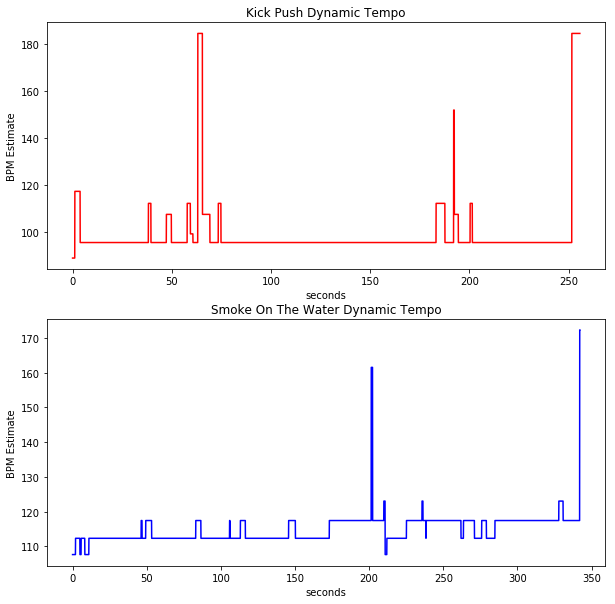

In [9]:
kick_dtempo = tempo(kick, aggregate=None)
smoke_dtempo = tempo(smoke, aggregate=None)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(librosa.frames_to_time(np.arange(len(kick_dtempo))), kick_dtempo, color='red', linewidth=1.5)
plt.title("Kick Push Dynamic Tempo")
plt.ylabel("BPM Estimate")
plt.xlabel("seconds")

plt.subplot(2,1,2)
plt.plot(librosa.frames_to_time(np.arange(len(smoke_dtempo))), smoke_dtempo, color='blue', linewidth=1.5)
plt.title("Smoke On The Water Dynamic Tempo")
plt.ylabel("BPM Estimate")
plt.xlabel("seconds")


We can further consider "Fur Elise," which, like many other classical pieces, has a fluctuating tempo dependent on the style of the performer/conductor:

Text(0.5, 0, 'seconds')

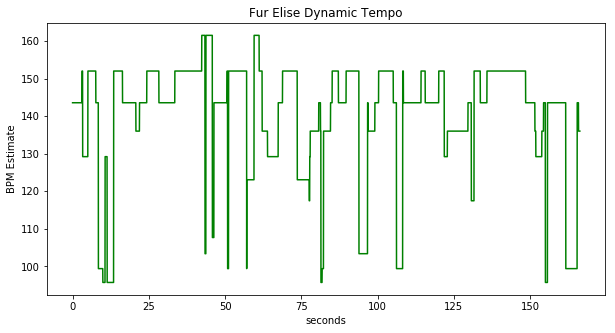

In [10]:
elise, sr = librosa.load("1-24 Bagatelle for Piano In A Minor.wav")
elise_tempo = tempo(elise)
elise_dtempo = tempo(elise, aggregate=None)

plt.figure(figsize=(10,5))
plt.plot(librosa.frames_to_time(np.arange(len(elise_dtempo))), elise_dtempo, color='green', linewidth=1.5)
plt.title("Fur Elise Dynamic Tempo")
plt.ylabel("BPM Estimate")
plt.xlabel("seconds")

These plots point to a couple additional tempo related features which could discriminate between song types:

__A.  Tempo Variability__

The big difference separating "Fur Elise" from the other two recordings is the lack of a consistent tempo.  Possible ways to quantify this would be to take the standard deviation of the tempo estimates, or to count the number of unique tempo estimates.  However, both these metrics are troublesome:

In [11]:
print("Tempo SD\n")
print("Kick Push:", kick_dtempo.std())
print("Smoke On The Water:",smoke_dtempo.std())
print("Fur Elise:", elise_dtempo.std())

print("\nUnique Tempos\n")
print("Kick Push:",len(np.unique(kick_dtempo)))
print("Smoke On The Water:",len(np.unique(smoke_dtempo)))
print("Fur Elise:",len(np.unique(elise_dtempo)))

Tempo SD

Kick Push: 14.520360201591211
Smoke On The Water: 3.9525130318799255
Fur Elise: 15.695322051807963

Unique Tempos

Kick Push: 8
Smoke On The Water: 6
Fur Elise: 11


"Kick Push" and "Fur Elise" have similar standard deviations of tempo, despite "Kick Push" having a constant tempo (driven by the few outlier tempo values, seen on the plot).

Additionally, the number of unique tempos does not reflect the degree of tempo variation seen between songs on the plots; we should expect "Fur Elise" to have a drastically higher value than the other two.

Rather, we can compute the number of times the tempo estimate _changes_.  This is possible to quantify because the LibROSA tempo algorithm tends to snap to isolated values:

In [12]:
#https://stackoverflow.com/questions/19125661/find-index-where-elements-change-value-nump

def tempo_changes(x, normalize = False):
    """Takes a non-aggregated tempo array from librosa.beat.tempo() and computes the number of changes in the tempo estimate.
    That is, x = librosa.beat.tempo(y, aggregate = None) where y is an audiofile.
    
    Arguments:
    normalize (default = False)
    -when True, standardizes the tempo changes to length of the array (and thereby the song length)
    
    Returns: # of tempo changes as a numpy integer.  Does this by testing equivalency of each value 
    in the array to the subsequent value. """
    changes = sum(x[:-1] != x[1:])
    if normalize == True:
        changes = changes/len(x)*100
        
    return changes

print("Tempo Changes\n")
print("Kick Push:", tempo_changes(kick_dtempo))
print("Smoke On The Water:", tempo_changes(smoke_dtempo))
print("Fur Elise:", tempo_changes(elise_dtempo))

Tempo Changes

Kick Push: 22
Smoke On The Water: 37
Fur Elise: 73


These values reflect the relatively fluctuating tempo in the classical piece.  In the final feature extraction, we can also normalize these values to the length of the song (consider here that "Fur Elise" is the shortest recording, but has the most tempo changes!)

__B.  Tempo Confidence__

Recall above that the tempo of "Smoke On The Water" was slightly overestimated.  Looking at the dynamic tempo plot, we can see that there are essential two values which the estimation approaches: 112 or 117.  This issue could be due to a lack of salient beat information detectable by the algorithm, or it could reflect a genuine difference in tempo between two parts of the song.  Either of these possibilities might be more common in rock or jazz music compared to hip-hop, given the 1) prominence of drums in hip-hop music and 2) the fact that hip-hop often depends on quantized, programmed instrumentals rather than live performances.

What I call "tempo confidence" will be a measure of how sure, or consistent, the tempo measurement is over the course of the song.  To compute this, we will identify the frequency of the most frequent tempo estimate.  The value, between 0 and 1, will reflect this frequency:

In [13]:
# https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python

def tempo_conf(x):
    return max(np.unique(x, return_counts=True)[1]/sum(np.unique(x, return_counts=True)[1]))
    """Takes a non-aggregated tempo array from librosa.beat.tempo() and computes
    the frequency of the most common tempo across the tempogram, known here as 'tempo confidence'.
    
    That is, x = librosa.beat.tempo(y, aggregate = None) where y is an audiofile.
    
    Returns: a numpy integer value"""

print("Tempo Certainty\n")
print("Kick Push:", tempo_conf(kick_dtempo))
print("Smoke On The Water:", tempo_conf(smoke_dtempo))
print("Fur Elise:", tempo_conf(elise_dtempo))

Tempo Certainty

Kick Push: 0.8826627917537009
Smoke On The Water: 0.5172741464739021
Fur Elise: 0.35826936496859735


Now, we see that for "Kick, Push" there is one tempo estimate for the majority of the song's duration, while the other songs lack this consistency.

## The Mix: Bass, Middle, & Treble Distribution

Musical genres also differ in their _equalization_, or the balance of frequencies across the audio spectrum (i.e. the 20-20,000 Hz that humans can hear).  Each instrument or voice will contribute to a subset range of the audio spectrum.  The use of different instruments will therefore affect the distribution of frequencies within a recording.  Moreover, audio engineers will mix and master recordings in order to emphasize frequencies to foster a desired style or feeling.  As pictured below, many music players will have equalizers which allow you to tweak the audio in line with the genre:

![alt](https://images.techhive.com/images/article/2016/05/equalizer-100662622-primary.idge.png)

LibROSA has some very nice graphing capabilities which allow us to illustrate equalization.  By plotting a _spectrogram_ using [specshow()](https://librosa.github.io/librosa/generated/librosa.core.amplitude_to_db.html), we can show what frequencies are most active over the course of a sound, or a song.  These three plots show the spectrograms of a synthetic sub-bass sound, a small cello line, and a single violin note:

Text(0.5, 1.0, 'Violin')

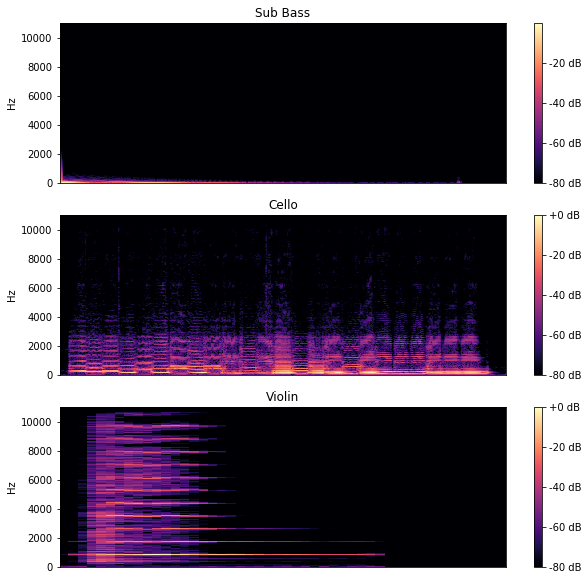

In [14]:
from librosa import amplitude_to_db
from librosa.display import specshow

plt.figure(figsize=(10,10))

subbass, sr = librosa.load('Bass_Blower_01.wav')
plt.subplot(3,1,1)
D = librosa.amplitude_to_db(np.abs(librosa.stft(subbass)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Sub Bass')

cello, sr = librosa.load('cello low.wav')
plt.subplot(3,1,2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(cello)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Cello')

violin, sr = librosa.load('violin high.wav')
plt.subplot(3,1,3)
D = librosa.amplitude_to_db(np.abs(librosa.stft(violin)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Violin')

Sub-bass is relegated to the very lowest audible frequencies.  Cello has signal into the 2-4k Hz range, yet it does not penetrate much beyond this.  Violin, the brighter, higher pitched instrument, resounds throughout the 10k Hz range.

How do we assess the equalization of our songs?  While full song recordings have more complex spectrograms, they are still built up from individual instruments and sounds which are biased towards certain parts of the spectral range.  We will use some rule of thumb cut-offs of the audio spectrum, try and develop a value for each song's presence in that range.

[teachmeaudio.com](https://www.teachmeaudio.com/mixing/techniques/audio-spectrum/) has a nice page describing some of the important frequency bands that audio engineers will consider, and how they contribute to the audio qualities of a song.  While not absolute truths, these values provide a jumping off point for processing our audio: 

| Frequency Range | Frequency Values |
| --- | --- |
| Sub-bass | 20-60 Hz |
| Bass | 60-250 Hz |
| Low midrange | 250-500 Hz |
| Midrange | 500-2000 Hz |
| Upper midrange | 2000-4000 Hz |
| Presence | 4000-6000 Hz |
| Brilliance | 6000-20000 Hz |


However, I have not figured a straightforward way to slice the frequency power information presented in the spectrograms by LibROSA.  The issue is that `specshow()` creates a y-axis of Hz from 0-~11,000 from a NumPy array with 1025 columns (generated by `amplitude_to_db()`; you can see this by viewing the array D created in the code above.  It is unclear how this conversion is made.

To get around this, I will use the [sine wave generator from audiocheck.net](https://www.audiocheck.net/audiofrequencysignalgenerator_sinetone.php).  I have downloaded 6 sine waves at the edges of these frequency bands (60 Hz, 250 Hz, 500 Hz, 2k Hz, 4k Hz, & 6k Hz) and placed them in the `sinewaves` folder in our directory.  To show them simultaneously on one spectrogram, we will simply sum the NumPy arrays that LibROSA generates from each wave using the `amplitude_to_db()` function.  The summed array will be called `sumsine`. 

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

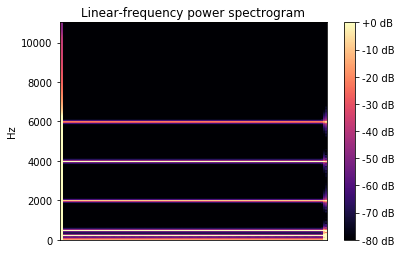

In [15]:
sumsine = np.empty((1025, 130))
for i in os.listdir(directory + "sinewaves/"):
    y, sr = librosa.load(directory + "sinewaves/" + i)
    sumsine += librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    
#these lines correct for the artifacts made when summing

#this line normalizes the array so that -80.0 db is still the lower end
sumsine = sumsine + (len(os.listdir(directory +"sinewaves/"))-1)*80
#this line makes 0 the max value, correcting the onset and offset of the
#sine waves which does have some overlap
sumsine = np.clip(sumsine, a_min=None, a_max=0)

librosa.display.specshow(sumsine, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

We can then find the indexes of the of rows where `sumsine` is 0 (aka where the power is maximum).

    

In [16]:
# https://stackoverflow.com/questions/38862657/find-value-greater-than-level-python-pandas
sumsinedf = pd.DataFrame(sumsine)
bands = list(sumsinedf[sumsinedf[70].gt(-0.01)].index)

#column 70 is used only to pick a position in the middle of the audio signal
#this avoids the messier frequencies associated with onset and offset of the sine waves

print(bands)

[6, 23, 46, 186, 372, 557]


These results agree with a visual inspection of the `sumsinedf`, but I will not show this here.

Now, with these cutoffs, we can compute the average power in each of frequency band for each of our songs!  Let's try this for "Kick, Push" and "Fur Elise."

In [17]:
def freqbands_average(x):
    """Takes a decibel array of an audiofile and computes the average signal in 7 frequency bands
    (see https://www.teachmeaudio.com/mixing/techniques/audio-spectrum/)
    
    x should be defined such that x = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    where y is an audiofile
    
    Returns a dictionary with 7 entries, the keys being the titles of frequency bands and
    values being the average decibel signal in each of those bands.
    
    Frequency band ('key)': frequency range
    sub-bass ('sub') = 0-60 Hz
    bass ('bass)'= 60-250 Hz
    low mid-range ('lomid') = 250-500 Hz
    mid-range ('mid') = 500-2000 Hz
    high mid-range ('himid') = 2000-4000 Hz
    presence ('pres') = 4000-6000 Hz
    brilliance ('brill') = > 6000 Hz
    """
    avgs = {}
    avgs['sub'] = x[0:6, :].mean()
    avgs['bass'] = x[6:23, :].mean()
    avgs['lomid'] = x[23:46,:].mean()
    avgs['mid'] = x[46:186,:].mean()
    avgs['himid'] = x[186:372,:].mean()
    avgs['pres'] = x[372:557, :].mean()
    avgs['brill'] = x[557:,:].mean()
    
    return avgs

kick_array = librosa.amplitude_to_db(np.abs(librosa.stft(kick)), ref=np.max)
print("Kick, Push:\n", freqbands_average(kick_array))

elise_array = librosa.amplitude_to_db(np.abs(librosa.stft(elise)), ref=np.max)
print("Fur Elise:\n", freqbands_average(elise_array))

Kick, Push:
 {'sub': -41.193768, 'bass': -33.795918, 'lomid': -39.10915, 'mid': -49.59386, 'himid': -51.04879, 'pres': -53.984875, 'brill': -59.648888}
Fur Elise:
 {'sub': -69.54757, 'bass': -47.09338, 'lomid': -46.767212, 'mid': -63.287964, 'himid': -78.217606, 'pres': -79.89284, 'brill': -79.99634}


"Kick, Push" has greater values across the board.  This may indicate that the recording is louder, which we may expect for a modern rap song compared to classical piece for just piano.  There are larger discrepancies in the very low and very high frequency range, which may also arise from the differences in recording, mixing, and mastering between the two songs.  

Hopefully, computing these values for all of the songs will inform the equalization differences that exist between genres.

## Peak Signal & RMS

As touched upon in the section above, it is possible that different genres may differ in their overall loudness.  This may be due to the different types of arrangements, but also due to trends in music production ([for example](https://en.wikipedia.org/wiki/Loudness_war)) which may affect some genres more than others.

[Both peak signaling and RMS (or root mean squared) are ways of measuring the overall level of audio](https://support.biamp.com/General/Audio/Peak_vs_RMS_Meters).  LibROSA provides [rms()](https://librosa.github.io/librosa/generated/librosa.feature.rms.html) for calculating the latter (instructions to plot are also provided):

Text(0.5, 1.0, 'Fur Elise RMS')

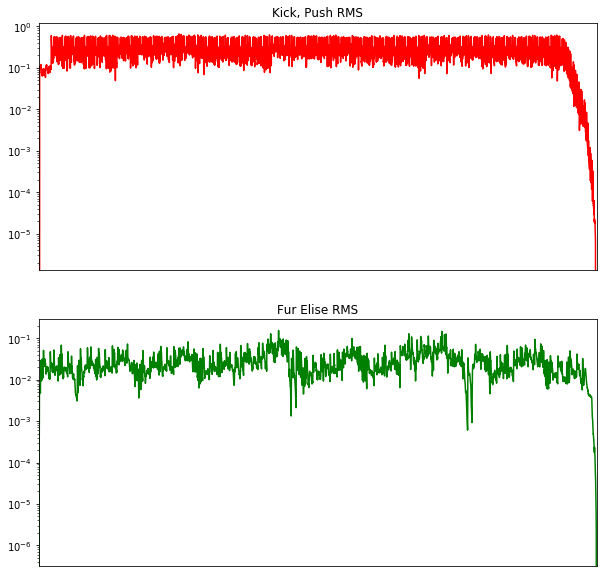

In [18]:
from librosa.feature import rms

kick_rms = rms(kick)
elise_rms = rms(elise)

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.semilogy(kick_rms.T, "r-")
plt.xticks([])
plt.xlim([0, kick_rms.shape[-1]])
plt.title('Kick, Push RMS')

plt.subplot(2,1,2)
plt.semilogy(elise_rms.T, "g-")
plt.xticks([])
plt.xlim([0, elise_rms.shape[-1]])
plt.title("Fur Elise RMS")

For calculating a measure of peak signal, we can use the arrays that were computed above to plot the spectrogram, i.e. what is created from `amplitude_to_db()`.

Text(0.5, 1.0, 'Fur Elise Peak')

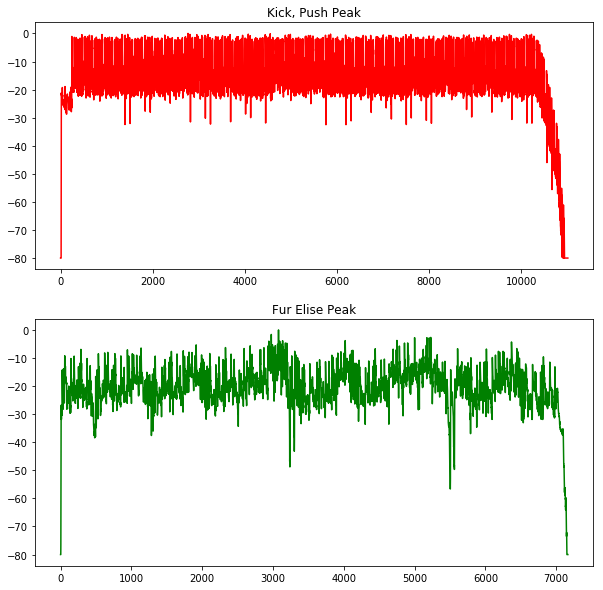

In [19]:
#finds the maximum value in each column of the array
kick_peak = kick_array.max(axis = 0)
elise_peak = elise_array.max(axis = 0)

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(kick_peak, "r-")
plt.title('Kick, Push Peak')

plt.subplot(2,1,2)
plt.plot(elise_peak, 'g-')
plt.title('Fur Elise Peak')

The peak and RMS plots, while not identical, are very similar (note that the RMS plot has a logarithmic scale, however).  The means and averages also appear to be proportional.  The mean signal from "Kick, Push" is higher, but has a higher standard deviation:

In [20]:
print(kick_rms.mean())
print(elise_rms.mean())
print()
print(kick_rms.std())
print(elise_rms.std())
print()
print(kick_peak.mean())
print(elise_peak.mean())
print()
print(kick_peak.std())
print(elise_peak.std())

0.2783821
0.027357593

0.14153045
0.017491981

-15.509742
-20.238327

11.240392
7.5644646


For our final DataFrame, we will only include the RMS signal, as it is likely that including both will not add any information.

## Other Features

The features described above were all based on concepts I had envisioned being useful for genre discrimination.  Additionally, I described these features because LibROSA has nice tools to illustrate them.

There are, however, a myriad of functions that LibROSA offers for processing audio.  Many of them tap into audio concepts or metrics that are beyond my understanding.  Or otherwise, some of the comprehensible concepts are assessed by metrics which are difficult to interpret.  It is possible that some of these outputs might be informative for classification.  I plan to compute some and add them to our `df`, but I will go into far less detail about their meaning and significance (most will be gleaned from their documentation).  For these features, we will compare their distribution across the genre labels, and identify if any of them might be important (even if their meaning is opaque).

Most of these features come from the [librosa.feature](https://librosa.github.io/librosa/feature.html) library.

- [spectral_centroid()](https://librosa.github.io/librosa/generated/librosa.feature.spectral_centroid.html#librosa.feature.spectral_centroid) The "mean" of the spectrogram for each frame of the audio file.  We will take the mean of these centroids for the whole file.
- [spectral_bandwith()](https://librosa.github.io/librosa/generated/librosa.feature.spectral_bandwidth.html#librosa.feature.spectral_bandwidth) I believe this marks the range of frequencies being excited over the course of the audio.  Again, we will compute a mean value.
- [spectral_contrast()](https://librosa.github.io/librosa/generated/librosa.feature.spectral_contrast.html) appears to be related to the equalization features described above; the metric is computed for different frequency bands.  From the plots you will see below, it is also unclear which band is which!  However, there do seem to be noticeable differences, at least in these songs.  We will compute a mean for each band's spectral contrast value when there are 4 bands.
- [spectral_flatness()](https://librosa.github.io/librosa/generated/librosa.feature.spectral_flatness.html) is a measure of how similar a sound is to white noise.  The output is a value from 0 to 1, with 1 indicating white noise.  The plots shown below interesting look very different for the three example songs, especially for "Fur Elise."  We will add to our `df` a measure of the average spectral flatness, as well as a measure of the spectral flatness within some middle interval of the song.
- [spectral_rolloff()](https://librosa.github.io/librosa/generated/librosa.feature.spectral_rolloff.html) ..... I don't really understand this one at all: *"The roll-off frequency is defined for each frame as the center frequency for a spectrogram bin such that at least roll_percent (0.85 by default) of the energy of the spectrum in this frame is contained in this bin and the bins below. This can be used to, e.g., approximate the maximum (or minimum) frequency by setting roll_percent to a value close to 1 (or 0)."*  I set the roll_percent to 0.5 and will take the mean value!
- [estimate_tuning()](https://librosa.github.io/librosa/generated/librosa.core.estimate_tuning.html#librosa.core.estimate_tuning) I also don't fully understand, but I did want to include something related to pitch (see below).  The function returns an estimated tuning, which I believe is in [cents](https://en.wikipedia.org/wiki/Cent_(music)).  I'm not sure if this means a deviation from some standard tuning (like A = 440 Hz), or if it is more of a measure of the piece being in tune relative to itself.

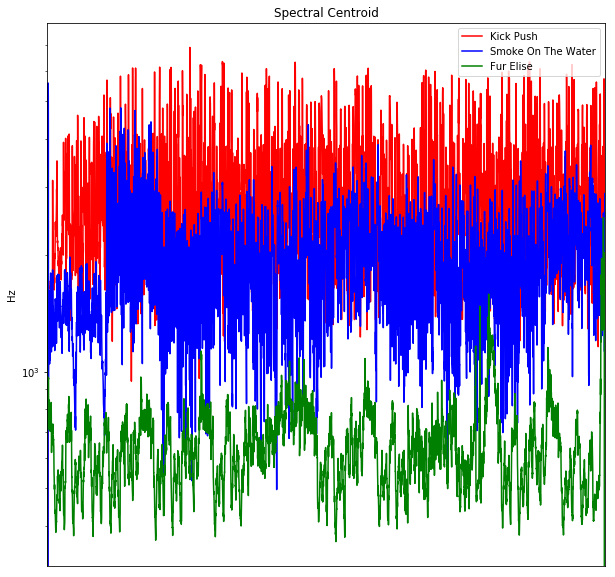

In [21]:
#spectral centroid

from librosa.feature import spectral_centroid

kick_centroid = spectral_centroid(kick)
smoke_centroid = spectral_centroid(smoke)
elise_centroid = spectral_centroid(elise)

plt.figure(figsize=(10,10))
plt.title("Spectral Centroid")

plt.semilogy(kick_centroid.T, "r-",label='Kick Push')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, kick_centroid.shape[-1]])
plt.legend()

plt.semilogy(smoke_centroid.T, "b-",label='Smoke On The Water')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, smoke_centroid.shape[-1]])
plt.legend()

plt.semilogy(elise_centroid.T, 'g',label='Fur Elise')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, elise_centroid.shape[-1]])
plt.legend()

#mean can be computed simply by spectral_centroid(y).mean()

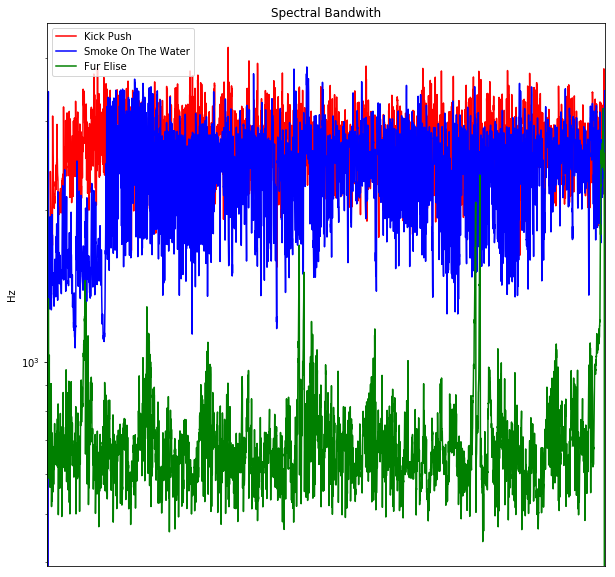

In [22]:
#spectral bandwith

from librosa.feature import spectral_bandwidth

kick_bw = spectral_bandwidth(kick)
smoke_bw = spectral_bandwidth(smoke)
elise_bw = spectral_bandwidth(elise)

plt.figure(figsize=(10,10))
plt.title("Spectral Bandwith")

plt.semilogy(kick_bw.T, "r-",label='Kick Push')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, kick_bw.shape[-1]])
plt.legend()

plt.semilogy(smoke_bw.T, "b-",label='Smoke On The Water')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, smoke_bw.shape[-1]])
plt.legend()

plt.semilogy(elise_bw.T, 'g',label='Fur Elise')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, elise_bw.shape[-1]])
plt.legend()

#mean can be computed simply by spectral_bandwidth(y).mean()

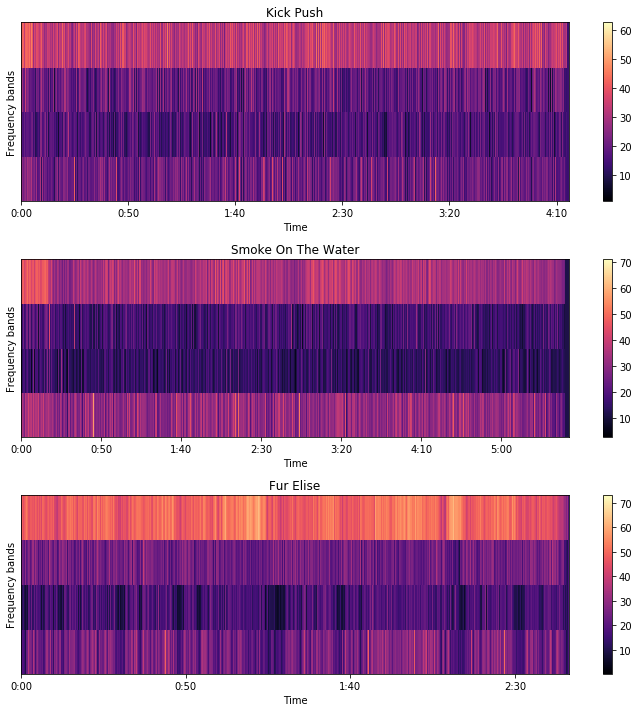

In [23]:
from librosa.feature import spectral_contrast

plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
librosa.display.specshow(spectral_contrast(kick, n_bands=3), x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Kick Push')
plt.tight_layout()

plt.subplot(3,1,2)
librosa.display.specshow(spectral_contrast(smoke, n_bands=3), x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Smoke On The Water')
plt.tight_layout()

plt.subplot(3,1,3)
librosa.display.specshow(spectral_contrast(elise, n_bands=3), x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Fur Elise')
plt.tight_layout()

#function for extracting spectral contrast values
def get_SCmean(y, n = 4):
    """Function that computes the average spectral contrast for n bands in an audio file y.
    Uses librosa.feature.spectral_contrast().  Defaults n to 4 bands (note that for spectral_contrast(),
    n-1 is input to give n bands)
    
    Returns: a dictionary with 'band n' keys and mean spectral contrast values"""
    
    SC_mean = spectral_contrast(y, n_bands=n-1).mean(axis = 1)
    dct = {}
    for i in range(n):
        dct["band " + str(i)] = SC_mean[i]
    return dct

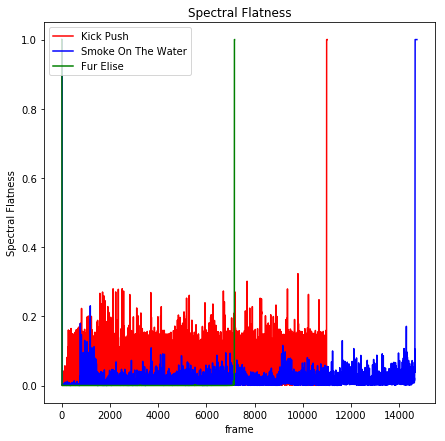

In [24]:
#spectral flatness

from librosa.feature import spectral_flatness

plt.figure(figsize=(7,7))
plt.plot(spectral_flatness(kick).T, 'r', label = "Kick Push")
plt.plot(spectral_flatness(smoke).T, 'b', label = "Smoke On The Water")
plt.plot(spectral_flatness(elise).T, 'g', label = "Fur Elise")
plt.title("Spectral Flatness")
plt.ylabel("Spectral Flatness")
plt.xlabel('frame')
plt.legend(loc = 2)

#the mean spectral flatness is simply given by spectral_flatness(y).mean()

#function for peak spectral flatness (of an internal interval)

def spectral_flatness_peak(y, start = .10, end = .90):
    """Computes the peak spectral flatness for an audiofile for a given interval of the audiofile
    Uses librosa.feature.spectral_flatness()
    
    Arguments:
    y = an audio file, readable by librosa.core.load()
    start = the start of the proportion of the audio file in which to find the peak (value between 0 and 1)
    end = the end of the proportion of the audio file in which to find the peak (value between 0 and 1)
    
    Returns:
    the maximum value of the spectral flatness area between the cutoffs
    """
    if start >= end:
        raise ValueError("End must be greater than start")
    if start > 1 or start < 0:
        raise ValueError ('Cutoffs must be between 0 and 1')
    if end > 1 or end < 0:
        raise ValueError ('Cutoffs must be between 0 and 1')
    sf = spectral_flatness(y)[0]
    peak = max(sf[round(len(sf)*start):round(len(sf)*end)])
    return peak    

Text(0.5, 1.0, 'Spectral Rolloff')

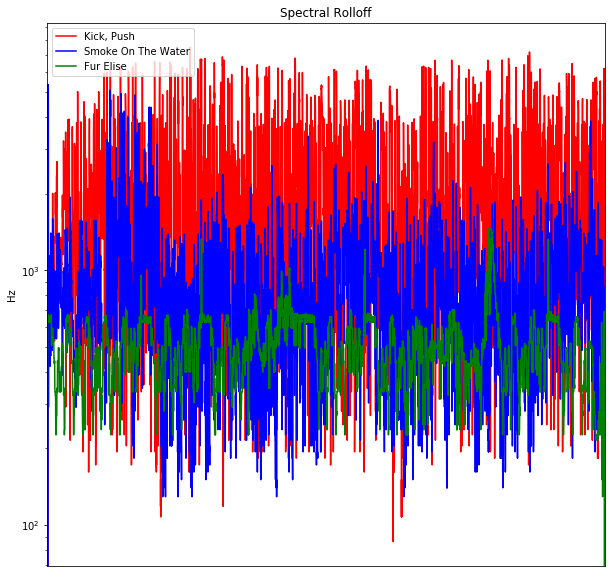

In [25]:
#spectral rolloff

from librosa.feature import spectral_rolloff

plt.figure(figsize=(10,10))
plt.semilogy(spectral_rolloff(kick, roll_percent=.5).T, 'r', label='Kick, Push')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spectral_rolloff(kick).shape[-1]])

plt.semilogy(spectral_rolloff(smoke, roll_percent=.5).T, 'b', label='Smoke On The Water')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spectral_rolloff(smoke).shape[-1]])

plt.semilogy(spectral_rolloff(elise, roll_percent=.5).T, 'g', label='Fur Elise')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spectral_rolloff(elise).shape[-1]])
plt.legend(loc = 2)
plt.title('Spectral Rolloff')

#to compute spectral_rolloff for a given percent b, simply use spectral_rolloff(y, roll_percent=b).mean()

In [26]:
#tuning

from librosa.core import estimate_tuning

print(librosa.core.estimate_tuning(kick))
print(librosa.core.estimate_tuning(smoke))
print(librosa.core.estimate_tuning(elise))

-0.07
0.14
0.17000000000000004


It should be noted that I could be missing important features for classification!  Outside of the features that are (relatively easily) computable from an audio file, there are genre characteristics that are very defining, such as the instrumentation, rhythmic patterns, or the lyrical content.  Moreover, there are likely more computable features that are relevant.

For example, one such feature may be the key, scale, or other measure of the harmonic complexity.  LibROSA does have some tools for this, but I did not find ways to get metrics which could be learned upon.  Below shows the production of a "chromagram" from the [chroma_stft()](https://librosa.github.io/librosa/generated/librosa.feature.chroma_stft.html#librosa.feature.chroma_stft) function for "Smoke On The Water."  Interestingly, there is a strong signal in the "G" pitch class, which is the root pitch of the song!

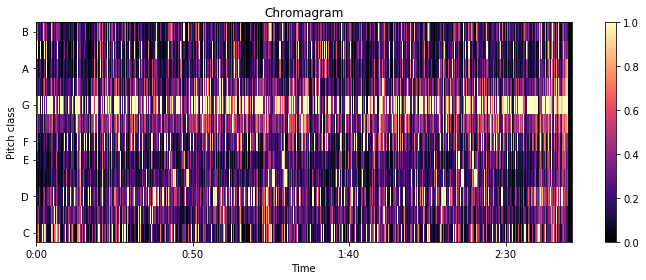

In [27]:
from librosa import stft
from librosa.feature import chroma_stft

S = np.abs(librosa.stft(smoke, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)

plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

# Feature Extraction

Now, we can compute the features for each song.  To recap, these are the 23 features we will include:
- duration (seconds)
- tempo
- tempo changes (normalized to song length)
- tempo confidence
- the strength for 7 frequency bands
- mean RMS
- standard deviation of RMS
- mean spectral centroid
- mean spectral bandwidth
- mean spectral contrast for 4 frequency bands
- mean spectral flatness
- peak spectral flatness (of inner 80%)
- mean spectral rolloff
- tuning deviation

Again, we want to only load each song once using `librosa.core.load()`.  We will do so, compute the desired features, and save them into new columns of `df`.  I'll include some `print()` statements for progress updates.  

I forgot to add `%%time` when running this, but I think it took 1-2 hours to run.

In [29]:
for i in range(len(df["song"])):
    genre = df.at[i, "genre"]
    for j in os.listdir(directory + genre):
        if df["song"][i] == j:
            print('Processing', df['song'][i])
            y, sr = librosa.load(directory + genre + '/' + j)
            
            #duration
            df.at[i, "duration"] = librosa.get_duration(y)
            
            #tempo
            df.at[i, "tempo"] = tempo(y)[0]
            
            #tempo changes & confidence
            dt = tempo(y, aggregate=None)
            
            df.at[i, "tempo_changes"] = tempo_changes(dt, normalize=True)
            df.at[i, "tempo_confidence"] = tempo_conf(dt)
            
            #audio spectrum power
            y_dbarray = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
            fb_avg = freqbands_average(y_dbarray)
            
            for key in fb_avg:
                df.at[i, key + "_strength"] = fb_avg[key]
            
            #rms
            df.at[i, "mean_RMS"] = rms(y).mean()
            
            df.at[i, "std_RMS"] = rms(y).std()
            
            #spectral centroid
            df.at[i, "spectral_centroid"] = spectral_centroid(y).mean()
            
            #spectral bandwidth
            df.at[i, "spectral_bandwidth"] = spectral_bandwidth(y).mean()
            
            #spectral contrast (4 bands)
            SCmeanfour = get_SCmean(y)
            
            for key in SCmeanfour:
                df.at[i, key + "_contrast"] = SCmeanfour[key]
                
            #spectral flatness
            df.at[i, "mean_flatness"] = spectral_flatness(y).mean()
            
            df.at[i, "peak_flatness"] = spectral_flatness_peak(y)
            
            #spectral rolloff
            df.at[i, "rolloff(0.5)"] = spectral_rolloff(y, roll_percent=0.5).mean()
            
            #tuning
            df.at[i, "tuning"] = estimate_tuning(y)
                  
            print("Finished " + df['song'][i])
            print("song " + str(i + 1) + " of 200")

Processing 2-18 Adagio In G Minor.wav


C:\Users\earne\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Finished 2-18 Adagio In G Minor.wav
song 1 of 200
Processing 1-22 Symphony No. 94 In G Major, Hob.wav
Finished 1-22 Symphony No. 94 In G Major, Hob.wav
song 2 of 200
Processing 2-47 3 Gymnopédies_ Gymnopedie No.3.wav
Finished 2-47 3 Gymnopédies_ Gymnopedie No.3.wav
song 3 of 200
Processing 1-48 Symphony No. 5 In C Sharp Minor.wav
Finished 1-48 Symphony No. 5 In C Sharp Minor.wav
song 4 of 200
Processing 2-21 Symphonies de Fanfares_ Rondeau.wav
Finished 2-21 Symphonies de Fanfares_ Rondeau.wav
song 5 of 200
Processing 2-28 Symphonie Espagnole In D Minor.wav
Finished 2-28 Symphonie Espagnole In D Minor.wav
song 6 of 200
Processing 2-34 Sylvia_ Procession of Bacchus.wav
Finished 2-34 Sylvia_ Procession of Bacchus.wav
song 7 of 200
Processing 2-46 The Sorcerer's Apprentice.wav
Finished 2-46 The Sorcerer's Apprentice.wav
song 8 of 200
Processing 1-12 Solomon, HWV 67 (arr. for Organ.wav
Finished 1-12 Solomon, HWV 67 (arr. for Organ.wav
song 9 of 200
Processing 2-02 Slavonic Dances, Op. 46, N

Finished 07 FUN!.wav
song 84 of 200
Processing 11 Forbidden Fruit (feat. Kendrick L.wav
Finished 11 Forbidden Fruit (feat. Kendrick L.wav
song 85 of 200
Processing 02 First Day Out.wav
Finished 02 First Day Out.wav
song 86 of 200
Processing 02 For My People.wav
Finished 02 For My People.wav
song 87 of 200
Processing The Food (Feat. Kanye West) (Studio.wav
Finished The Food (Feat. Kanye West) (Studio.wav
song 88 of 200
Processing 02 Doomsday.wav
Finished 02 Doomsday.wav
song 89 of 200
Processing 02 Energy.wav
Finished 02 Energy.wav
song 90 of 200
Processing 06 Dirt Off Your Shoulder.wav
Finished 06 Dirt Off Your Shoulder.wav
song 91 of 200
Processing 03 Chrome (Like Ooh).wav
Finished 03 Chrome (Like Ooh).wav
song 92 of 200
Processing 03 Cilvia Demo.wav
Finished 03 Cilvia Demo.wav
song 93 of 200
Processing Crew (CDQ).wav
Finished Crew (CDQ).wav
song 94 of 200
Processing 01 Check the Rhime.wav
Finished 01 Check the Rhime.wav
song 95 of 200
Processing 08 Can't Go Wrong.wav
Finished 08 Can'

Finished 07 Eye to Eye.wav
song 185 of 200
Processing 04 Expo '86.wav
Finished 04 Expo '86.wav
song 186 of 200
Processing 02 Everybody Wants Some!!.wav
Finished 02 Everybody Wants Some!!.wav
song 187 of 200
Processing 02 Dirty Work.wav
Finished 02 Dirty Work.wav
song 188 of 200
Processing 09 Elephant.wav
Finished 09 Elephant.wav
song 189 of 200
Processing 04 Day Tripper.wav
Finished 04 Day Tripper.wav
song 190 of 200
Processing 19 Comfortably Numb.wav
Finished 19 Comfortably Numb.wav
song 191 of 200
Processing 01 Come Together.wav
Finished 01 Come Together.wav
song 192 of 200
Processing 1-07 Can't Stop.wav
Finished 1-07 Can't Stop.wav
song 193 of 200
Processing 1-16 Bringin' On The Heartache.wav
Finished 1-16 Bringin' On The Heartache.wav
song 194 of 200
Processing 01 Blue Blood.wav
Finished 01 Blue Blood.wav
song 195 of 200
Processing 07 Blue Morning, Blue Day.wav
Finished 07 Blue Morning, Blue Day.wav
song 196 of 200
Processing 07 Basket Case.wav
Finished 07 Basket Case.wav
song 197 

Finally, we can write `df` to a `.csv` file.  Now, whenever we begin to work with the dataset, we don't have to run this costly loop every time.

In [31]:
df.to_csv('songs.csv')

The actual learning will begin in the second notebook (Part II), which will depend only on the `songs.csv` file, and not any of the audio files.